In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

from utils import prepare_cifar10_data, train_model, evaluate_model, show_reconstructed_images
from models import VAE, compute_loss_vae

### Medium Latent Dimension and Medium Learning Rate
___

In [2]:
batch_size = 64
learning_rate = 1e-3
latent_dim=128

num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

writer = SummaryWriter(log_dir=f'runs/VAE_L')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [3]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

vae_model = VAE(latent_dim).to(device)
optimizer = optim.Adam(vae_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=vae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 1913.9694
val Loss: 1587.5708
Epoch 2/20
train Loss: 1507.7380
val Loss: 1473.1148
Epoch 3/20
train Loss: 1435.9845
val Loss: 1428.3495
Epoch 4/20
train Loss: 1405.1246
val Loss: 1403.4564
Epoch 5/20
train Loss: 1388.9238
val Loss: 1390.8894
Epoch 6/20
train Loss: 1379.8274
val Loss: 1388.2961
Epoch 7/20
train Loss: 1372.9694
val Loss: 1380.6080
Epoch 8/20
train Loss: 1368.8571
val Loss: 1379.7534
Epoch 9/20
train Loss: 1365.6837
val Loss: 1373.8094
Epoch 10/20
train Loss: 1362.0756
val Loss: 1375.2475
Epoch 11/20
train Loss: 1360.2340
val Loss: 1371.6311
Epoch 12/20
train Loss: 1357.6815
val Loss: 1369.1489
Epoch 13/20
train Loss: 1356.0895
val Loss: 1369.3580
Epoch 14/20
train Loss: 1354.2269
val Loss: 1366.2845
Epoch 15/20
train Loss: 1353.2958
val Loss: 1366.7555
Epoch 16/20
train Loss: 1352.1041
val Loss: 1363.7450
Epoch 17/20
train Loss: 1350.9803
val Loss: 1362.2127
Epoch 18/20
train Loss: 1349.8416
val Loss: 1362.9294
Epoch 19/20
train Loss: 1348.6291
val

In [4]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_vae,
    device=device
)

Test Loss: 1351.0674


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


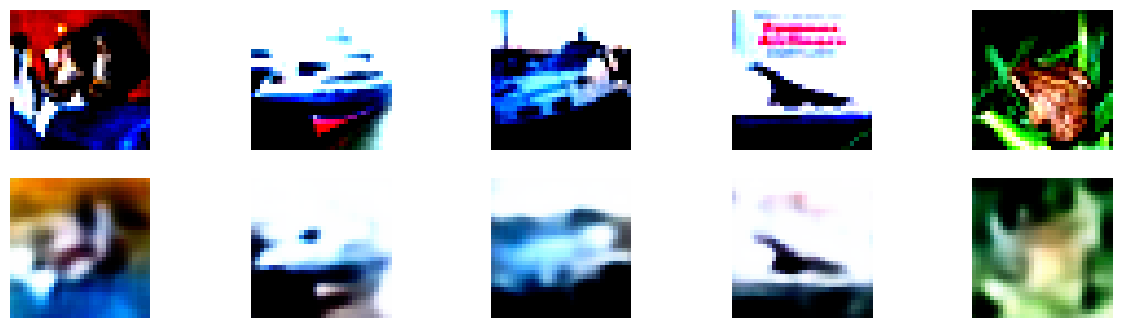

In [6]:
show_reconstructed_images(trained_model, test_loader, device, num_images=5)

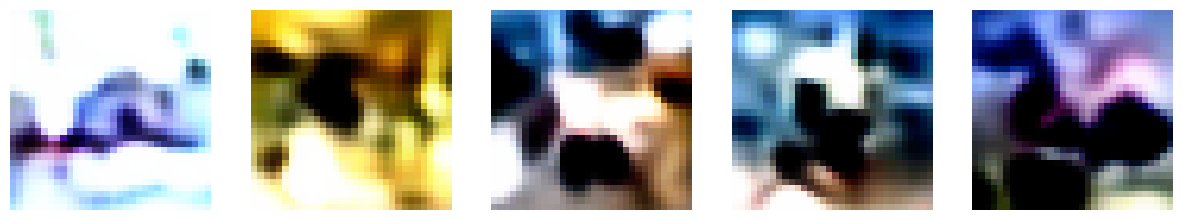

In [5]:
_ = trained_model.generate(device=device)

### Larger Latent Dimension and Slower Learning Rate
___

In [7]:
batch_size = 128
learning_rate = 1e-4
latent_dim=256

num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

writer = SummaryWriter(log_dir=f'runs/VAE_big_ls')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [8]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

vae_model = VAE(latent_dim).to(device)
optimizer = optim.Adam(vae_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=vae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 2899.1083
val Loss: 2228.8719
Epoch 2/20
train Loss: 2080.8595
val Loss: 1931.4758
Epoch 3/20
train Loss: 1864.8100
val Loss: 1811.5249
Epoch 4/20
train Loss: 1774.9903
val Loss: 1745.6095
Epoch 5/20
train Loss: 1718.3683
val Loss: 1691.9338
Epoch 6/20
train Loss: 1668.8251
val Loss: 1648.5107
Epoch 7/20
train Loss: 1625.9475
val Loss: 1608.6680
Epoch 8/20
train Loss: 1590.0746
val Loss: 1575.9378
Epoch 9/20
train Loss: 1558.8161
val Loss: 1547.3592
Epoch 10/20
train Loss: 1532.8811
val Loss: 1525.1794
Epoch 11/20
train Loss: 1511.8277
val Loss: 1505.8619
Epoch 12/20
train Loss: 1495.0172
val Loss: 1489.5897
Epoch 13/20
train Loss: 1480.4286
val Loss: 1477.9952
Epoch 14/20
train Loss: 1468.1215
val Loss: 1464.9345
Epoch 15/20
train Loss: 1457.4987
val Loss: 1456.9758
Epoch 16/20
train Loss: 1448.4235
val Loss: 1447.7689
Epoch 17/20
train Loss: 1440.2614
val Loss: 1438.9606
Epoch 18/20
train Loss: 1433.0018
val Loss: 1431.9300
Epoch 19/20
train Loss: 1426.4329
val

In [9]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_vae,
    device=device
)

Test Loss: 1417.1669


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


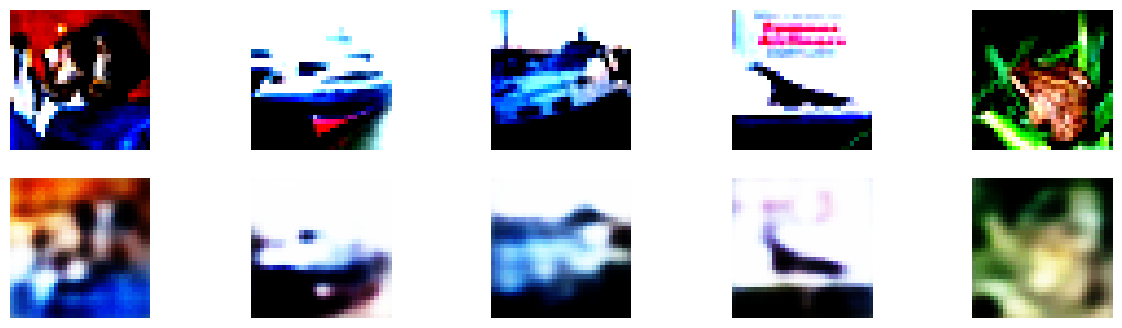

In [10]:
show_reconstructed_images(trained_model, test_loader, device, num_images=5)

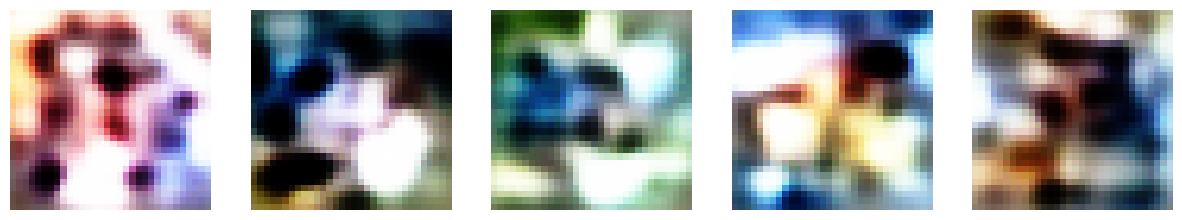

In [11]:
_ = trained_model.generate(device=device)

### Smaller Latent Dimension and Higher Learning Rate
___

In [12]:
batch_size = 128
learning_rate = 1e-4
latent_dim=256

num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

writer = SummaryWriter(log_dir=f'runs/VAE_small_ls')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [13]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

vae_model = VAE(latent_dim).to(device)
optimizer = optim.Adam(vae_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=vae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 2906.6216
val Loss: 2232.1203
Epoch 2/20
train Loss: 2135.9298
val Loss: 2023.2993
Epoch 3/20
train Loss: 1912.7966
val Loss: 1807.6370
Epoch 4/20
train Loss: 1787.4485
val Loss: 1728.6021
Epoch 5/20
train Loss: 1722.3883
val Loss: 1674.7652
Epoch 6/20
train Loss: 1671.9139
val Loss: 1627.4463
Epoch 7/20
train Loss: 1631.1083
val Loss: 1592.6467
Epoch 8/20
train Loss: 1597.0255
val Loss: 1561.4825
Epoch 9/20
train Loss: 1566.3289
val Loss: 1532.1094
Epoch 10/20
train Loss: 1540.0664
val Loss: 1511.3635
Epoch 11/20
train Loss: 1518.5562
val Loss: 1490.1006
Epoch 12/20
train Loss: 1501.1310
val Loss: 1474.9770
Epoch 13/20
train Loss: 1486.4695
val Loss: 1460.7439
Epoch 14/20
train Loss: 1474.1644
val Loss: 1449.1468
Epoch 15/20
train Loss: 1463.3150
val Loss: 1439.2953
Epoch 16/20
train Loss: 1453.8265
val Loss: 1431.0119
Epoch 17/20
train Loss: 1445.6619
val Loss: 1423.6794
Epoch 18/20
train Loss: 1438.3986
val Loss: 1416.5238
Epoch 19/20
train Loss: 1431.7738
val

In [14]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_vae,
    device=device
)

Test Loss: 1417.1179


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


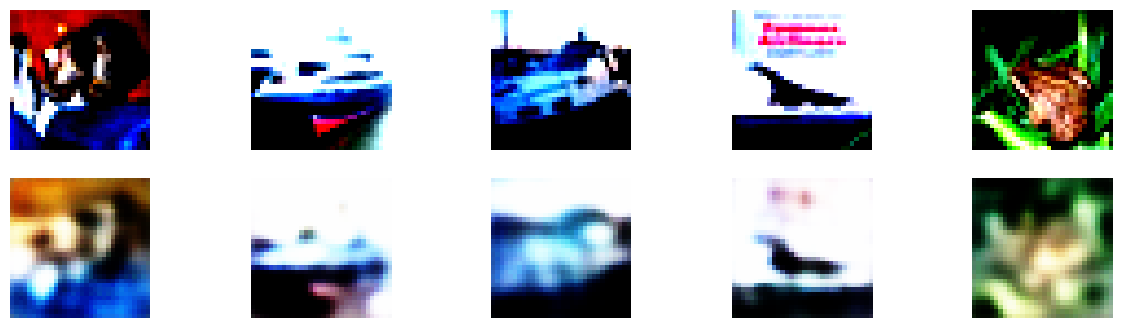

In [15]:
show_reconstructed_images(trained_model, test_loader, device, num_images=5)

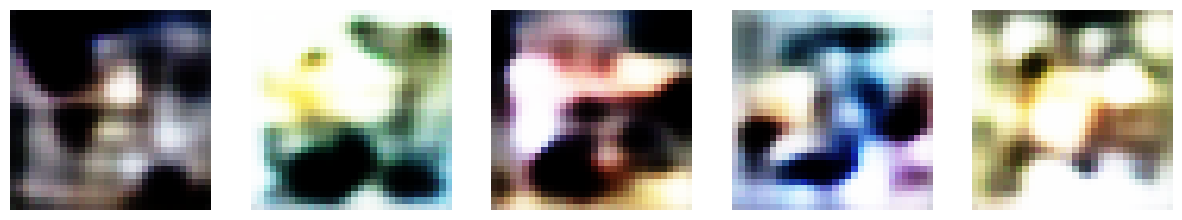

In [16]:
_ = trained_model.generate(device=device)